<a href="https://colab.research.google.com/github/Srijita264/Coronavirus-Fake-News-Classification/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This code constitutes a comprehensive approach to text classification using a Long Short-Term Memory (LSTM) neural network.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

#####The dataset, comprised of labeled tweets, is loaded from CSV files and subjected to a preprocessing step that involves removing special symbols, converting text to lowercase, and eliminating stopwords. The text is then tokenized and padded to facilitate input to the LSTM model. The model architecture includes an embedding layer, an LSTM layer with dropout for regularization, and a dense layer with softmax activation for classification into 'fake' or 'real' categories. The script handles the compilation and training of the model, with performance metrics such as accuracy and loss evaluated on both validation and test datasets.

Epoch 1/10
61/61 [==============================] - 15s 214ms/step - loss: 1.2377 - accuracy: 0.7701 - val_loss: 0.5321 - val_accuracy: 0.8657
Epoch 2/10
61/61 [==============================] - 10s 166ms/step - loss: 0.2819 - accuracy: 0.9322 - val_loss: 0.2830 - val_accuracy: 0.8994
Epoch 3/10
61/61 [==============================] - 8s 138ms/step - loss: 0.2614 - accuracy: 0.9651 - val_loss: 0.3210 - val_accuracy: 0.8945
Epoch 4/10
61/61 [==============================] - 8s 126ms/step - loss: 0.0727 - accuracy: 0.9875 - val_loss: 0.2863 - val_accuracy: 0.9057
Epoch 5/10
61/61 [==============================] - 6s 99ms/step - loss: 0.0975 - accuracy: 0.9713 - val_loss: 0.4919 - val_accuracy: 0.8074
Epoch 6/10
61/61 [==============================] - 6s 90ms/step - loss: 0.2049 - accuracy: 0.9602 - val_loss: 0.2996 - val_accuracy: 0.9026
Epoch 7/10
61/61 [==============================] - 6s 100ms/step - loss: 0.0789 - accuracy: 0.9941 - val_loss: 0.2910 - val_accuracy: 0.9079
Epoch 

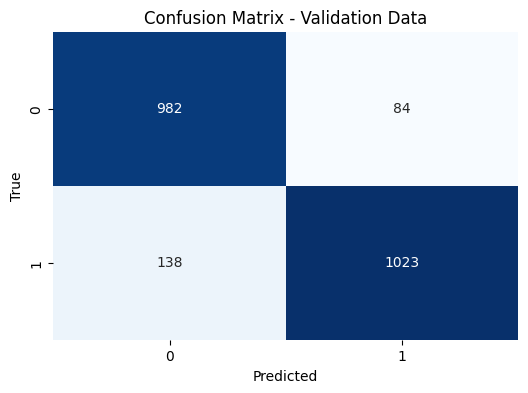

70/70 [==============================] - 1s 13ms/step


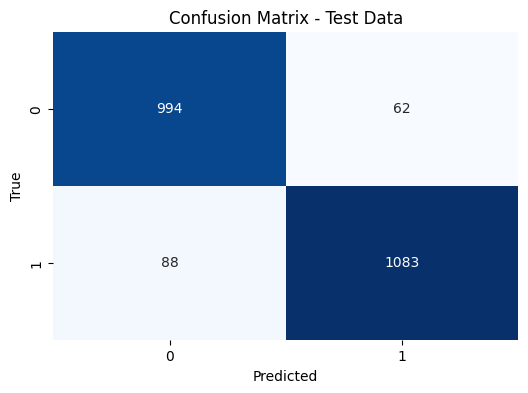

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data
train_data = pd.read_csv('/content/drive/MyDrive/Train_Data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Test_Data.csv')
val_data = pd.read_csv('/content/drive/MyDrive/Validation_Data.csv')

# Preprocessing
def preprocess_text(text):
    # Replace special symbols with space
    text = re.sub(r'[^\w\s]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    # Join the tokens back to a single string
    text = ' '.join(tokens)
    return text

train_data['preprocessed_text'] = train_data['tweet'].apply(preprocess_text)
val_data['preprocessed_text'] = val_data['tweet'].apply(preprocess_text)
test_data['preprocessed_text'] = test_data['tweet'].apply(preprocess_text)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['preprocessed_text'])

train_sequences = tokenizer.texts_to_sequences(train_data['preprocessed_text'])
val_sequences = tokenizer.texts_to_sequences(val_data['preprocessed_text'])
test_sequences = tokenizer.texts_to_sequences(test_data['preprocessed_text'])

# Padding
max_sequence_length = max(len(seq) for seq in train_sequences + val_sequences + test_sequences)
train_data_padded = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_data_padded = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_data_padded = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Define the LSTM model
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to numerical form
label_mapping = {'real': 1, 'fake': 0}
train_labels = train_data['label'].map(label_mapping)
val_labels = val_data['label'].map(label_mapping)
test_labels = test_data['label'].map(label_mapping)

# Train the model
history = model.fit(train_data_padded, train_labels, epochs=10, batch_size=112, validation_data=(val_data_padded, val_labels))

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_data_padded, val_labels)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_padded, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


# Predict class labels for validation data
val_predictions = np.argmax(model.predict(val_data_padded), axis=1)

val_cm = confusion_matrix(val_labels, val_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Data')
plt.show()

# Predict class labels for test data
test_predictions = np.argmax(model.predict(test_data_padded), axis=1)
test_cm = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Data')
plt.show()
